202101544 마영준

In [7]:
import torch
x = torch.tensor(data=[2.0, 3.0], requires_grad=True)
y = x**2
z = 2*y + 3

target = torch.tensor([3.0, 4.0])
loss = torch.sum(torch.abs(z-target))
loss.backward()
print(x.grad, y.grad, z.grad)

tensor([ 8., 12.]) None None


C:\Users\82105\anaconda3\lib\site-packages\torch\_tensor.py:1104: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:475.)
  return self._grad


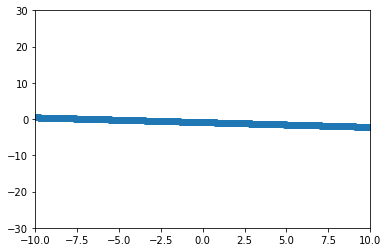

tensor(10.6004)


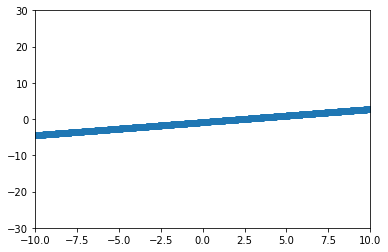

tensor(8.1797)


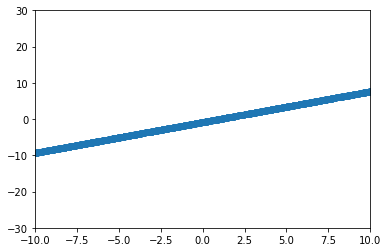

tensor(5.8090)


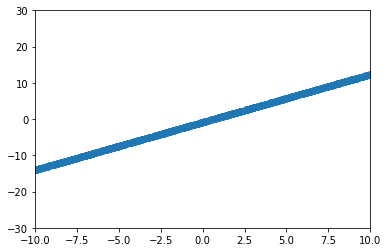

tensor(3.6110)


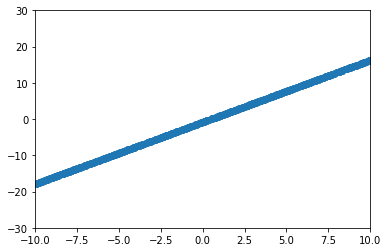

tensor(2.0961)


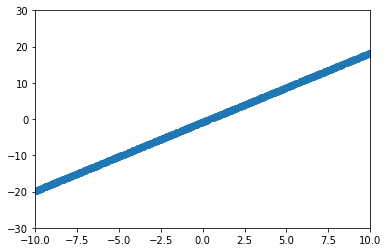

tensor(1.6877)


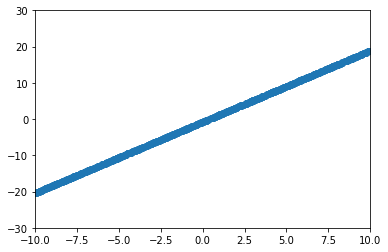

tensor(1.6425)


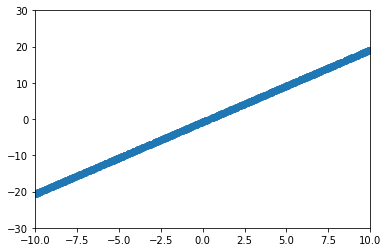

tensor(1.6322)


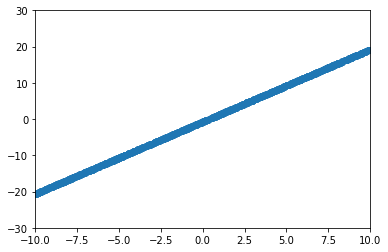

tensor(1.6267)


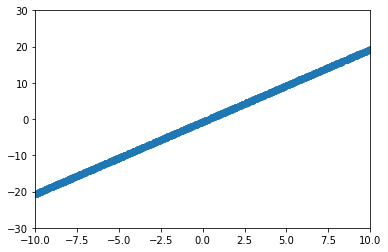

tensor(1.6220)


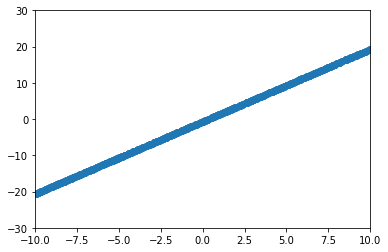

tensor(1.6174)


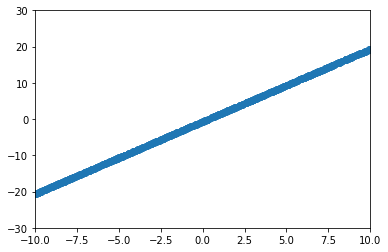

tensor(1.6130)


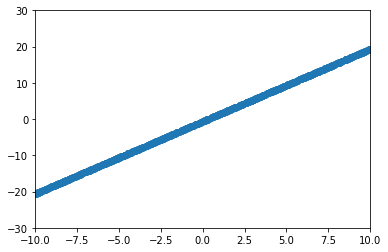

tensor(1.6087)


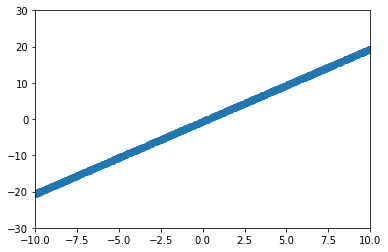

tensor(1.6047)


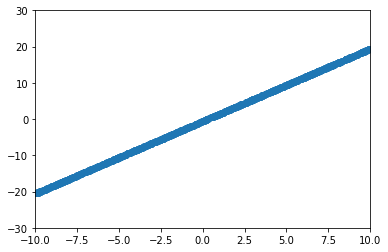

tensor(1.6009)


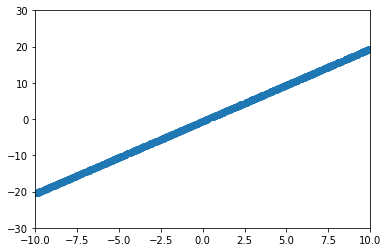

tensor(1.5971)


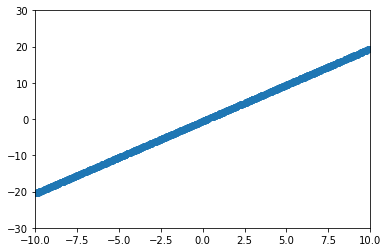

tensor(1.5939)


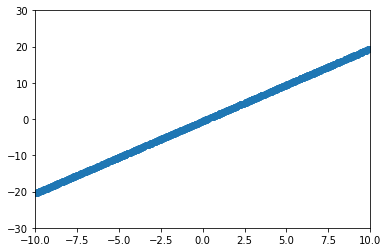

tensor(1.5910)


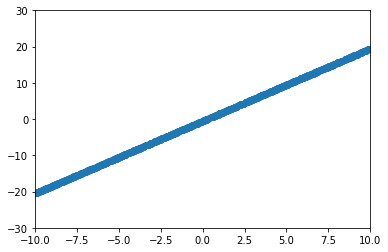

tensor(1.5881)


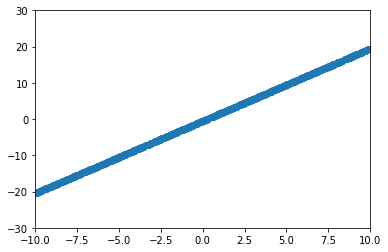

tensor(1.5855)


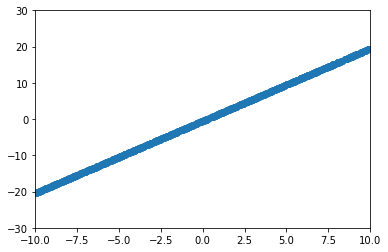

tensor(1.5831)


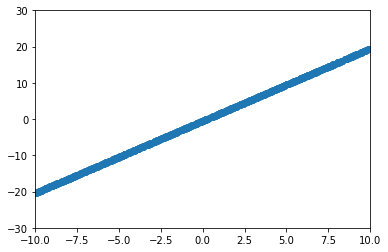

tensor(1.5809)


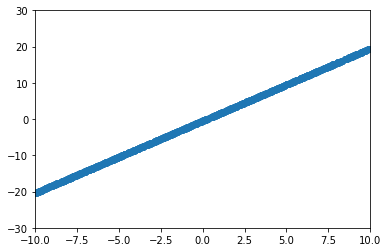

tensor(1.5788)


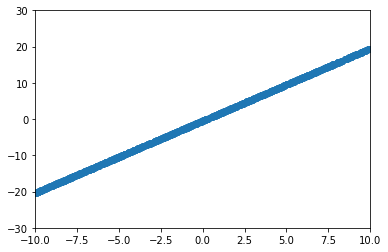

tensor(1.5768)


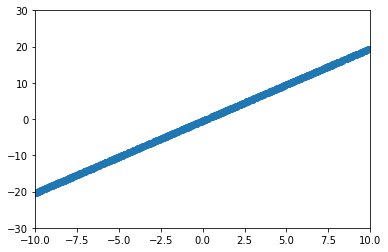

tensor(1.5749)


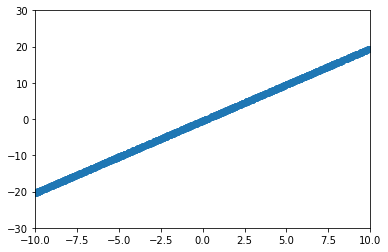

tensor(1.5731)


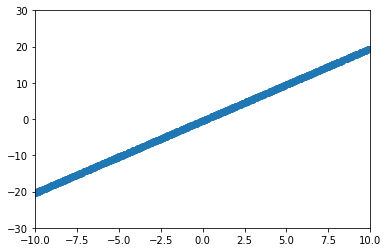

tensor(1.5714)


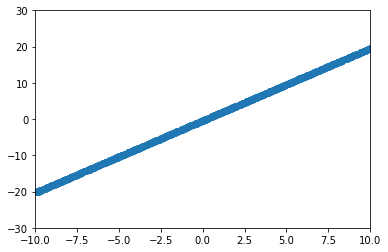

tensor(1.5698)


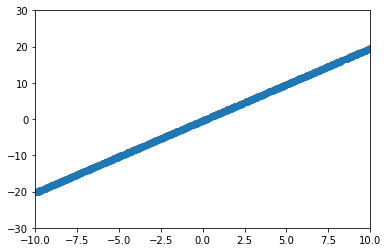

tensor(1.5682)


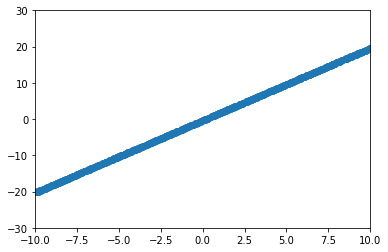

tensor(1.5667)


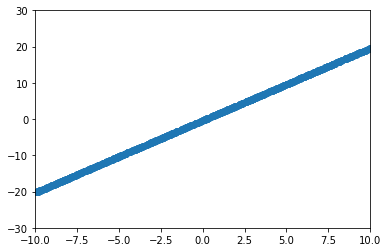

tensor(1.5653)


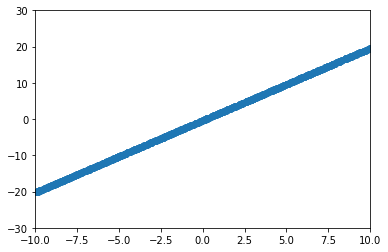

tensor(1.5639)


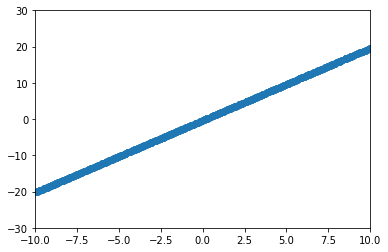

tensor(1.5627)


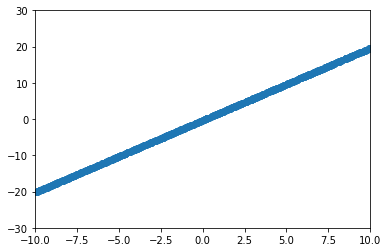

tensor(1.5617)


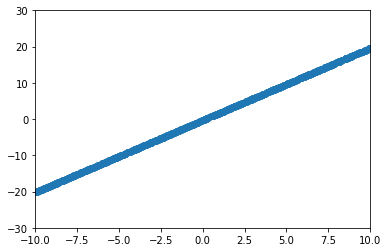

tensor(1.5609)


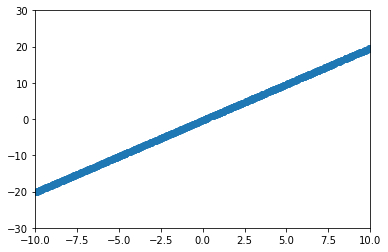

tensor(1.5601)


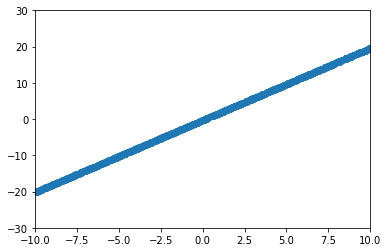

tensor(1.5594)


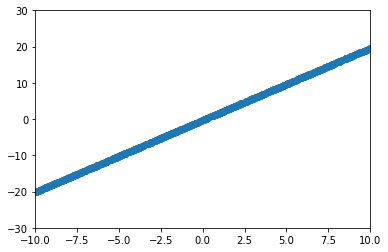

tensor(1.5586)


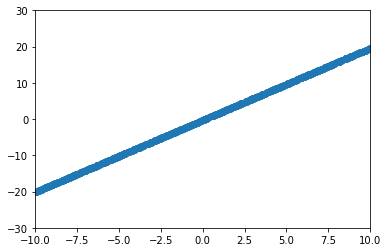

tensor(1.5579)


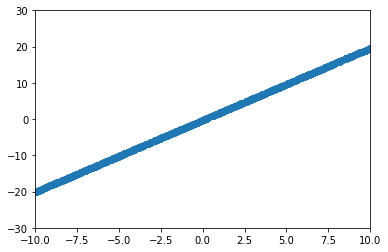

tensor(1.5573)


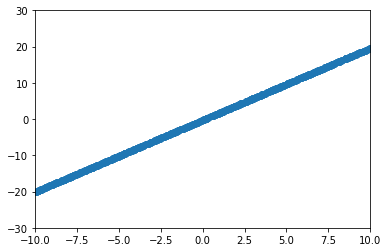

tensor(1.5567)


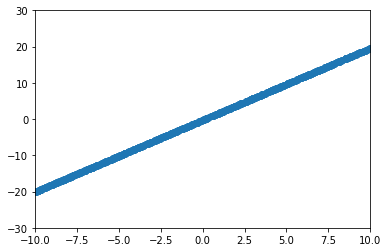

tensor(1.5561)


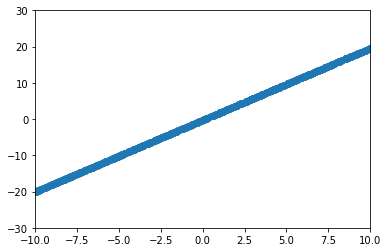

tensor(1.5554)


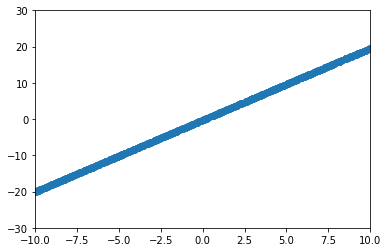

tensor(1.5549)


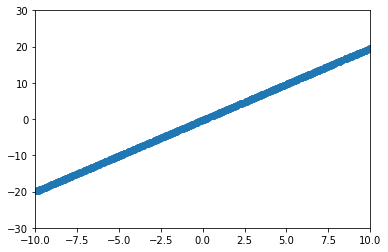

tensor(1.5543)


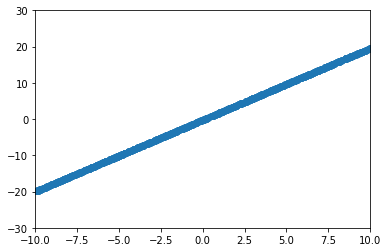

tensor(1.5538)


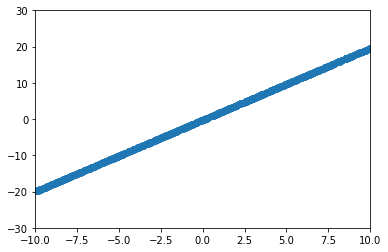

tensor(1.5534)


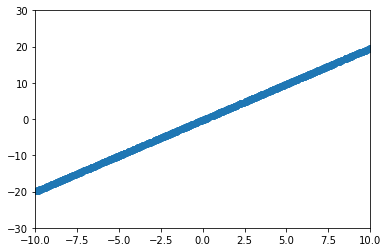

tensor(1.5529)


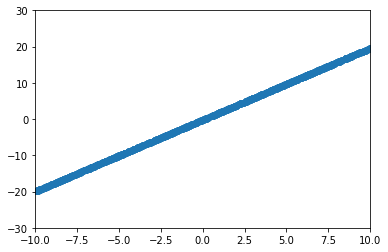

tensor(1.5525)


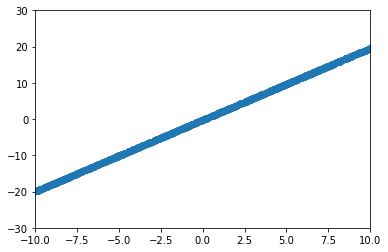

tensor(1.5522)


In [1]:
import numpy
import scipy.special
import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib.pyplot
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

num_data = 1000
num_epoch = 500
x = init.uniform_(torch.Tensor(num_data, 1), -10, 10)
noise = init.normal_(torch.FloatTensor(num_data, 1), mean=0.0, std=1.0)
y = 2*x+3
# y_noise 를 2*(x+noise)+3 에서 2*(x+noise) 로 변경
y_noise = 2*(x+noise)

model = nn.Linear(1,1)
loss_func = nn.L1Loss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

# 손실이 어떻게 변하는지 확인하기 위해 loss_arr를 만들어 기록합니다.
loss_arr =[]
# 또한 목표값은 y_noise로 지정해줍니다.
label = y_noise
# 500으로 지정했던 학습 횟수만큼 반복합니다.
for i in range(num_epoch):
    # 이전 학습의 기울기를 지우고 최적화 함수를 초기화해줍니다.
    # 기울기를 지우지 않으면 기존의 업데이트 때문에 학습이 잘 이루어지지 않습니다.
    optimizer.zero_grad()
    # 입력값 x를 모델에 넣어 결과값을 얻습니다.
    output = model(x)
    # 결과값과 목표값의 차이를 L1 손실 함수로 구해줍니다.
    loss = loss_func(output,label)    
    # 손실에 대한 기울기를 구합니다.
    loss.backward() 
    # 구한 기울기를 이용해 모델의 변수를 업데이트 합니다.
    optimizer.step()
    # 10번 마다 모델의 변수가 어떻게 변하고 있는지 출력해줍니다.
    if i % 10 == 0:
        # https://pytorch.org/docs/stable/tensors.html?highlight=detach#torch.Tensor.detach
        # 현재 연산 그래프에 속해있는 x, output 값을 detach를 통해 분리하고, 텐서를 넘파이 배열로 바꿔서 plt.scatter에 전달합니다.
        plt.scatter(x.detach().numpy(),output.detach().numpy())
        plt.axis([-10, 10, -30, 30])
        plt.show()
        print(loss.data)  
    # 손실을 loss_arr에 추가해줍니다.
    loss_arr.append(loss.detach().numpy())


202101544 마영준